In [87]:
import os
import sys
# Add src/ to sys.path (relative to current notebook)
sys.path.append(os.path.abspath("../../src"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

from utils.DataAnalysis import TableAnalysis, MyCustomException
from utils.VariableAnalysis import UnivariateAnalysis,BivariateAnalysis
from utils.pdf_file_save import PDFReportWriter

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [88]:
file_path = pathlib.Path('D:\Capstone Project\dataset\House_Price_dataset')
df = pd.read_csv(f"{file_path}/7.gurgaon_properties_outlier_treated.csv")
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,m3m woodshire,sector 107,0.80,5857.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,7.0,North-East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,1,165,683.0
1,flat,not applicable,sector 4,0.42,5600.0,750.0,Carpet area: 750 (69.68 sq.m.),2,2,1,3.0,NaN,Relatively New,NaN,NaN,750.0,0,0,0,0,0,1,26,375.0
2,flat,kashish manor one,sector 111,1.65,7097.0,2325.0,Super Built up area 2325(216 sq.m.),3,4,3+,14.0,NaN,Under Construction,2325.0,NaN,NaN,0,1,0,0,1,0,8,775.0
3,house,independent,sector 3,0.90,10000.0,900.0,Plot area 900(83.61 sq.m.)Built Up area: 3500 ...,3,4,3,3.0,NaN,Moderately Old,NaN,3500.0,NaN,0,0,0,0,1,1,42,300.0
4,flat,ss the leaf,sector 85,1.10,6318.0,1741.0,Super Built up area 1741(161.74 sq.m.)Carpet a...,2,2,3+,3.0,South-East,Relatively New,1741.0,NaN,1218.0,0,0,1,0,0,0,143,870.5


In [89]:
df.shape

(3556, 24)

In [90]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1684
built_up_area          1970
carpet_area            1711
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

## -----------------------Built up area Value Imputation --------------------------------

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

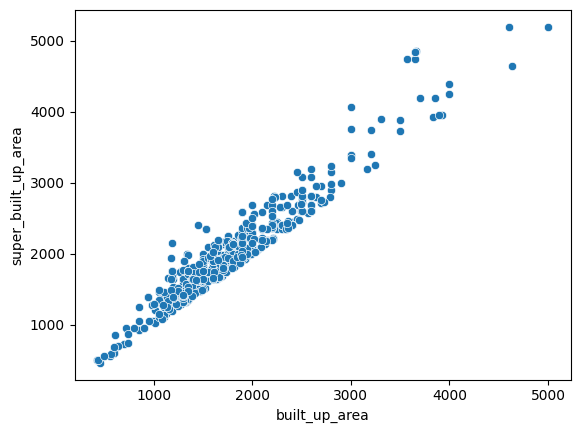

In [91]:
## Relationship between built_up_area and super_built_up_area
sns.scatterplot(x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

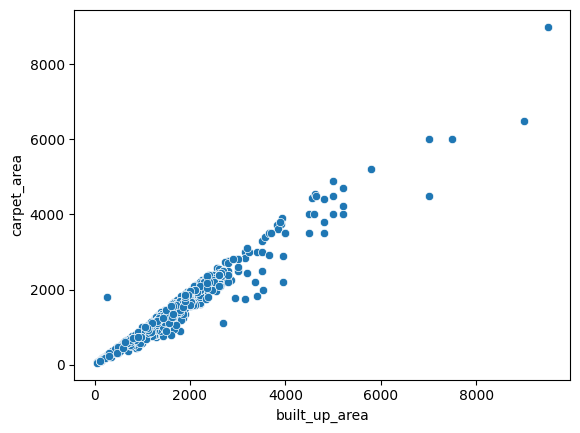

In [92]:
## Relationship between built_up_area and carpet_area
sns.scatterplot(x=df['built_up_area'],y=df['carpet_area'])

In [93]:
## Fetching records where super_built_up_area, built_up_area, and carpet_area are Null

df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio


In [94]:
## Fetching records where super_built_up_area, built_up_area, and carpet_area are Not Null

all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]
all_present_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
7,flat,ss the leaf,sector 85,2.20,11179.0,1968.0,Super Built up area 2812(261.24 sq.m.)Built Up...,4,5,3+,4.0,West,Relatively New,2812.0,2390.0,1968.0,0,1,0,1,0,0,174,492.000000
8,flat,emaar mgf the enclave,sector 66,2.10,12353.0,1700.0,Super Built up area 1920(178.37 sq.m.)Built Up...,3,4,2,12.0,North-East,Relatively New,1920.0,1800.0,1700.0,0,1,0,0,0,1,156,566.666667
17,flat,dlf the ultima,sector 81,2.50,11726.0,2132.0,Super Built up area 2132(198.07 sq.m.)Built Up...,3,3,2,20.0,West,Relatively New,2132.0,1700.0,1350.0,0,1,0,0,0,2,174,710.666667
18,flat,unitech harmony,sector 50,2.60,9591.0,2711.0,Super Built up area 2711(251.86 sq.m.)Built Up...,3,4,2,15.0,North-East,Relatively New,2711.0,2700.0,2200.0,0,1,0,0,1,1,174,903.666667
31,flat,dlf regal gardens,sector 90,1.25,8117.0,1540.0,Super Built up area 1702(158.12 sq.m.)Built Up...,3,3,3,8.0,South-East,Relatively New,1702.0,1640.0,1540.0,0,0,0,1,0,0,158,513.333333


In [95]:
all_present_df.shape

(531, 24)

In [96]:
## Calulating Ratio Between super_built_up_area to built_up_area ratio

super_to_built_up_ratio = round((all_present_df['super_built_up_area']/all_present_df['built_up_area']).median(),3)
super_to_built_up_ratio

np.float64(1.105)

In [97]:
## Calulating Ratio Between carpet_area to built_up_area ratio
carpet_to_built_up_ratio = round((all_present_df['carpet_area']/all_present_df['built_up_area']).median(),3)
carpet_to_built_up_ratio

np.float64(0.9)

In [98]:
## Fetching records where super_built_up_area(Not Null), carpet_area(Not Null), and built_up_area(isNull)
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,ss the leaf,sector 85,1.10,6318.0,1741.0,Super Built up area 1741(161.74 sq.m.)Carpet a...,2,2,3+,3.0,South-East,Relatively New,1741.0,NaN,1218.00,0,0,1,0,0,0,143,870.500000
14,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,17287.0,1128.0,Super Built up area 1852(172.06 sq.m.)Carpet a...,3,3,3,12.0,North-East,New Property,1852.0,NaN,1128.09,0,0,1,0,0,0,72,376.000000
33,flat,puri emerald bay,sector 104,2.25,10465.0,2150.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,4.0,North,Relatively New,2450.0,NaN,2150.00,0,1,0,0,0,1,159,716.666667
62,flat,bptp terra,sector 37d,1.72,9498.0,1811.0,Super Built up area 1811(168.25 sq.m.)Carpet a...,3,3,3,9.0,South,Relatively New,1811.0,NaN,996.30,1,0,0,0,0,1,24,603.666667
67,flat,shapoorji pallonji joyville gurugram,sector 102,1.99,20665.0,963.0,Super Built up area 1349(125.33 sq.m.)Carpet a...,2,2,2,14.0,South,New Property,1349.0,NaN,963.00,0,0,0,0,0,0,152,481.500000


In [99]:
## built_up_area value imputation logic [average of super_to_built_up_ratio + carpet_to_built_up_ratio]

calculated_built_up = (sbc_df['super_built_up_area']/super_to_built_up_ratio) + (sbc_df['carpet_area']/carpet_to_built_up_ratio)
calculated_built_up = round(calculated_built_up/2) ## Average

sbc_df['built_up_area'].fillna(calculated_built_up,inplace=True)
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
4,flat,ss the leaf,sector 85,1.10,6318.0,1741.0,Super Built up area 1741(161.74 sq.m.)Carpet a...,2,2,3+,3.0,South-East,Relatively New,1741.0,1464.0,1218.00,0,0,1,0,0,0,143,870.500000
14,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,17287.0,1128.0,Super Built up area 1852(172.06 sq.m.)Carpet a...,3,3,3,12.0,North-East,New Property,1852.0,1465.0,1128.09,0,0,1,0,0,0,72,376.000000
33,flat,puri emerald bay,sector 104,2.25,10465.0,2150.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,4.0,North,Relatively New,2450.0,2303.0,2150.00,0,1,0,0,0,1,159,716.666667
62,flat,bptp terra,sector 37d,1.72,9498.0,1811.0,Super Built up area 1811(168.25 sq.m.)Carpet a...,3,3,3,9.0,South,Relatively New,1811.0,1373.0,996.30,1,0,0,0,0,1,24,603.666667
67,flat,shapoorji pallonji joyville gurugram,sector 102,1.99,20665.0,963.0,Super Built up area 1349(125.33 sq.m.)Carpet a...,2,2,2,14.0,South,New Property,1349.0,1145.0,963.00,0,0,0,0,0,0,152,481.500000


In [100]:
## Update the df 
df.update(sbc_df)
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1684
built_up_area          1550
carpet_area            1711
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [101]:
## Fetching records where super_built_up_area(Not Null), built_up_area(is Null), carpet_area(is Null)
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,m3m woodshire,sector 107,0.80,5857.0,1366.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,7.0,North-East,Relatively New,1366.0,NaN,NaN,0,0,0,0,0,1,165,683.000000
2,flat,kashish manor one,sector 111,1.65,7097.0,2325.0,Super Built up area 2325(216 sq.m.),3,4,3+,14.0,NaN,Under Construction,2325.0,NaN,NaN,0,1,0,0,1,0,8,775.000000
5,flat,eldeco accolade,sohna road,0.78,6171.0,1264.0,Super Built up area 1264(117.43 sq.m.),2,2,2,3.0,NaN,Relatively New,1264.0,NaN,NaN,0,0,0,0,0,0,72,632.000000
10,flat,pioneer araya,sector 62,10.75,19499.0,5513.0,Super Built up area 5514(512.27 sq.m.),5,7,3,10.0,North-East,Relatively New,5514.0,NaN,NaN,0,1,0,0,0,1,153,1102.600000
15,flat,m3m capital,sector 113,2.51,14800.0,1696.0,Super Built up area 1695(157.47 sq.m.),3,3,3+,2.0,North-West,Under Construction,1695.0,NaN,NaN,1,0,0,0,0,0,49,565.333333


In [102]:
## built_up_area value imputation logic [super_built_up_area/super_to_built_up_ratio]
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/super_to_built_up_ratio),inplace=True)
df.update(sb_df)
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1684
built_up_area           677
carpet_area            1711
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [103]:
# Fetching Records super_built_up_area(isNull), built_up_area (isnull), and carpet_area(notNull)
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,not applicable,sector 4,0.42,5600.0,750.0,Carpet area: 750 (69.68 sq.m.),2,2,1,3.0,NaN,Relatively New,NaN,NaN,750.000000,0,0,0,0,0,1,26,375.000000
21,flat,smart world gems,sector 89,0.88,7964.0,1105.0,Carpet area: 1105 (102.66 sq.m.),2,2,3,2.0,NaN,New Property,NaN,NaN,1105.000000,1,0,0,0,0,0,44,552.500000
23,flat,ambience creacions,sector 22,4.80,19200.0,2500.0,Carpet area: 2500 (232.26 sq.m.),4,6,3+,10.0,North-East,New Property,NaN,NaN,2500.000000,0,1,0,1,0,2,49,625.000000
25,flat,signature global park 4,sector 36,1.00,9901.0,1010.0,Carpet area: 1010 (93.83 sq.m.),3,2,3,2.0,NaN,New Property,NaN,NaN,1010.000000,0,0,0,0,0,0,128,336.666667
30,flat,gls avenue 51,sector 92,0.39,6075.0,642.0,Carpet area: 641.74 (59.62 sq.m.),3,3,3+,6.0,North,Relatively New,NaN,NaN,641.743718,0,0,0,0,0,0,104,214.000000


In [104]:
## built_up_area logic [carpet_area / carpet_to_built_up_ratio]
c_df['built_up_area'].fillna(round(c_df['carpet_area']/carpet_to_built_up_ratio),inplace=True)

## Data Frame Update 
df.update(c_df)
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1009
agePossession             0
super_built_up_area    1684
built_up_area             0
carpet_area            1711
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

#### built_up_area Vs price relationship

<Axes: xlabel='built_up_area', ylabel='price'>

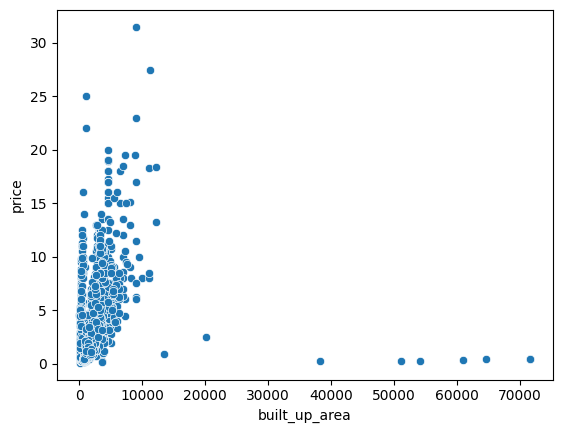

In [105]:
## Initial Visualization
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [106]:
## Anamoly Detection logic [built_up_area < 2000 and  price > 2.5 corer]
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]
anamoly_df.sample(5)

,price,area,built_up_area
541,5.15,3660.0,340.0
242,2.55,1630.0,1811.0
1547,9.50,4071.0,500.0
488,3.87,2250.0,1712.0
1940,11.00,4050.0,360.0


In [107]:
## Replace built_up_area value by area value in anamoly dataframe 
anamoly_df['built_up_area'] = anamoly_df['area']

## Updated df 
df.update(anamoly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

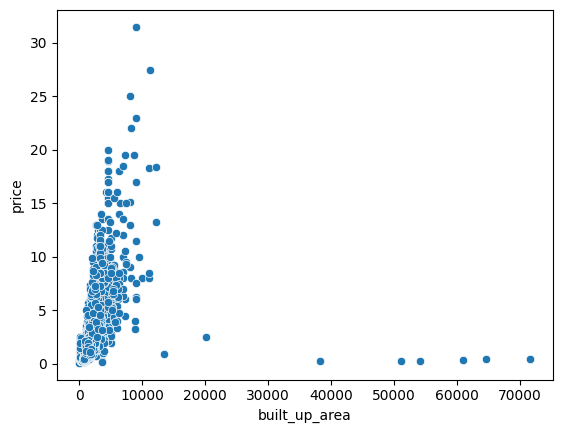

In [108]:
## Post anamoly update Visualization
sns.scatterplot(x=df['built_up_area'],y=df['price'])

In [109]:
## Dropping columns in main data frame 
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1009
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

## ------------------ floorNum value Imputation ------------------

In [110]:
## Fetching Floor Num missing 
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
115,house,ansal sushant lok plots,sector 43,3.30,26570.0,1,1,0,NaN,NaN,Under Construction,1242.0,0,0,0,0,0,0,0
436,house,independent,sector 26,4.60,12198.0,4,4,3+,NaN,NaN,Old Property,3771.0,0,0,0,0,0,0,28
1128,house,independent,sector 7,6.50,15046.0,3,2,3+,NaN,NaN,Old Property,4320.0,0,0,0,0,0,0,9
1338,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Old Property,360.0,0,0,0,0,0,0,0
1608,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Old Property,210.0,0,0,0,0,0,0,0
1615,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,0,0
1906,house,independent,sector 4,0.65,11111.0,4,2,2,NaN,NaN,Moderately Old,585.0,0,0,0,0,0,0,0
1936,house,vipul tatvam villa,sector 48,8.50,26235.0,4,4,2,NaN,East,Moderately Old,3240.0,0,1,1,1,0,0,88
2038,house,independent,sector 24,1.45,2984.0,3,3,1,NaN,NaN,Old Property,540.0,0,0,0,0,0,0,9
2179,house,independent,sector 2,5.60,17284.0,8,6,3+,NaN,South-West,Moderately Old,3240.0,1,1,1,1,0,0,0


In [111]:
## Calculating the floor value median value where property_type == house
floor_num_calculated_median = df[df['property_type'] == 'house']['floorNum'].median()
floor_num_calculated_median

np.float64(2.0)

In [112]:
## Imputing Floor Num Missing Value
df['floorNum'].fillna(floor_num_calculated_median,inplace=True)
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1009
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### ---------------------- facing Value Imputation ----------------------------------------

In [113]:
1011/df.shape[0]

0.28430821147356583

<Axes: ylabel='count'>

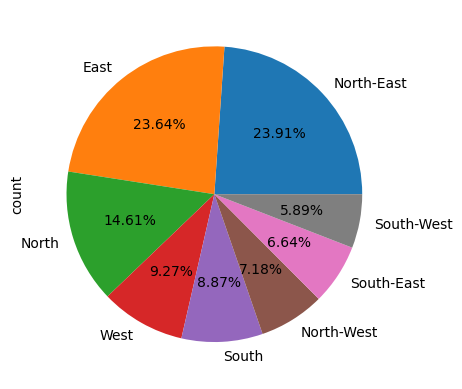

In [114]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [115]:
## Dropping facing column
df.drop(columns=['facing'],inplace=True)

df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
350,flat,shree vardhman victoria,sector 70,1.64,8410.0,3,5,3,8.0,Relatively New,1527.0,0,1,0,0,0,0,126
2736,flat,ansal housing highland park,sector 103,0.88,6428.0,2,2,3,3.0,New Property,1232.0,0,0,0,0,0,0,52
740,flat,ireo skyon,sector 60,3.70,13214.0,4,5,3,10.0,Relatively New,2534.0,0,1,0,0,0,1,165
2142,flat,city heights,sector 39,1.75,8750.0,3,4,3,3.0,Old Property,2222.0,0,1,0,0,0,2,42
1652,flat,signature andour heights,sector 71,0.39,9848.0,1,1,2,1.0,New Property,294.0,0,0,0,0,0,0,0


In [116]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

## -------------------------- Society value Imputation -----------------------------

In [117]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3026,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [118]:
## Dropping Society Value
index = df[df['society'].isnull()].index
print(index)

## Dropping the recod with respective index
df.drop(index= index,inplace=True)

df.isnull().sum()

Index([3026], dtype='int64')


property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

## -------------------------- agePossession Missing Value Imputation ---------------------------

In [119]:
df['agePossession'].value_counts()

agePossession
Relatively New        1610
New Property           555
Moderately Old         545
Old Property           293
Undefined              290
Under Construction     262
Name: count, dtype: int64

In [120]:
## Fetching records where agePossession = Undefined
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
9,flat,godrej air,sector 85,1.75,9589.0,3,3,2,27.0,Undefined,1825.0,0,0,0,0,0,0,44
11,house,independent,sector 38,8.00,25616.0,10,10,3+,1.0,Undefined,3123.0,0,0,0,0,0,0,0
12,flat,signature global orchard avenue,sector 93,0.85,14238.0,2,2,0,10.0,Undefined,597.0,0,0,0,0,0,0,0
16,flat,lavanya apartments,sector 81,0.90,5056.0,3,3,0,7.0,Undefined,1780.0,0,0,0,0,0,0,0
34,flat,shapoorji pallonji joyville,sector 102,1.10,12022.0,2,2,1,7.0,Undefined,915.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3501,flat,residency grand,sector 52,5.00,9615.0,5,5,3+,2.0,Undefined,5200.0,0,0,0,0,0,0,0
3506,flat,pivotal devaan apartments,sector 84,0.39,6500.0,2,2,0,5.0,Undefined,549.0,0,0,0,0,0,0,0
3512,flat,smart world gems,sector 89,1.10,9973.0,3,1,0,0.0,Undefined,1103.0,0,0,0,0,0,0,45
3541,flat,sapphire eighty three,sector 83,0.65,9286.0,1,1,0,6.0,Undefined,700.0,0,0,0,0,0,0,0


In [121]:

## Filling Undefined Value based on sector and Property type (mode)
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [122]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

df['agePossession'].value_counts()

agePossession
Relatively New        1733
New Property           584
Moderately Old         583
Old Property           326
Under Construction     276
Undefined               53
Name: count, dtype: int64

In [123]:
## Filling Undefined Value based on sector 
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [124]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)
df['agePossession'].value_counts()

agePossession
Relatively New        1743
Moderately Old         590
New Property           585
Old Property           336
Under Construction     276
Undefined               25
Name: count, dtype: int64

In [125]:
## Filling Undefined Value based on Property type (mode)
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [126]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)
df['agePossession'].value_counts()

agePossession
Relatively New        1745
Moderately Old         613
New Property           585
Old Property           336
Under Construction     276
Name: count, dtype: int64

In [127]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [128]:
df.shape

(3555, 18)

In [129]:
df.to_csv(f'{file_path}/8.gurgaon_properties_missing_value_imputation.csv',index=False)
